# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

Energia minima = -0.440041
mu = 0.80182
sigma = 0.633461


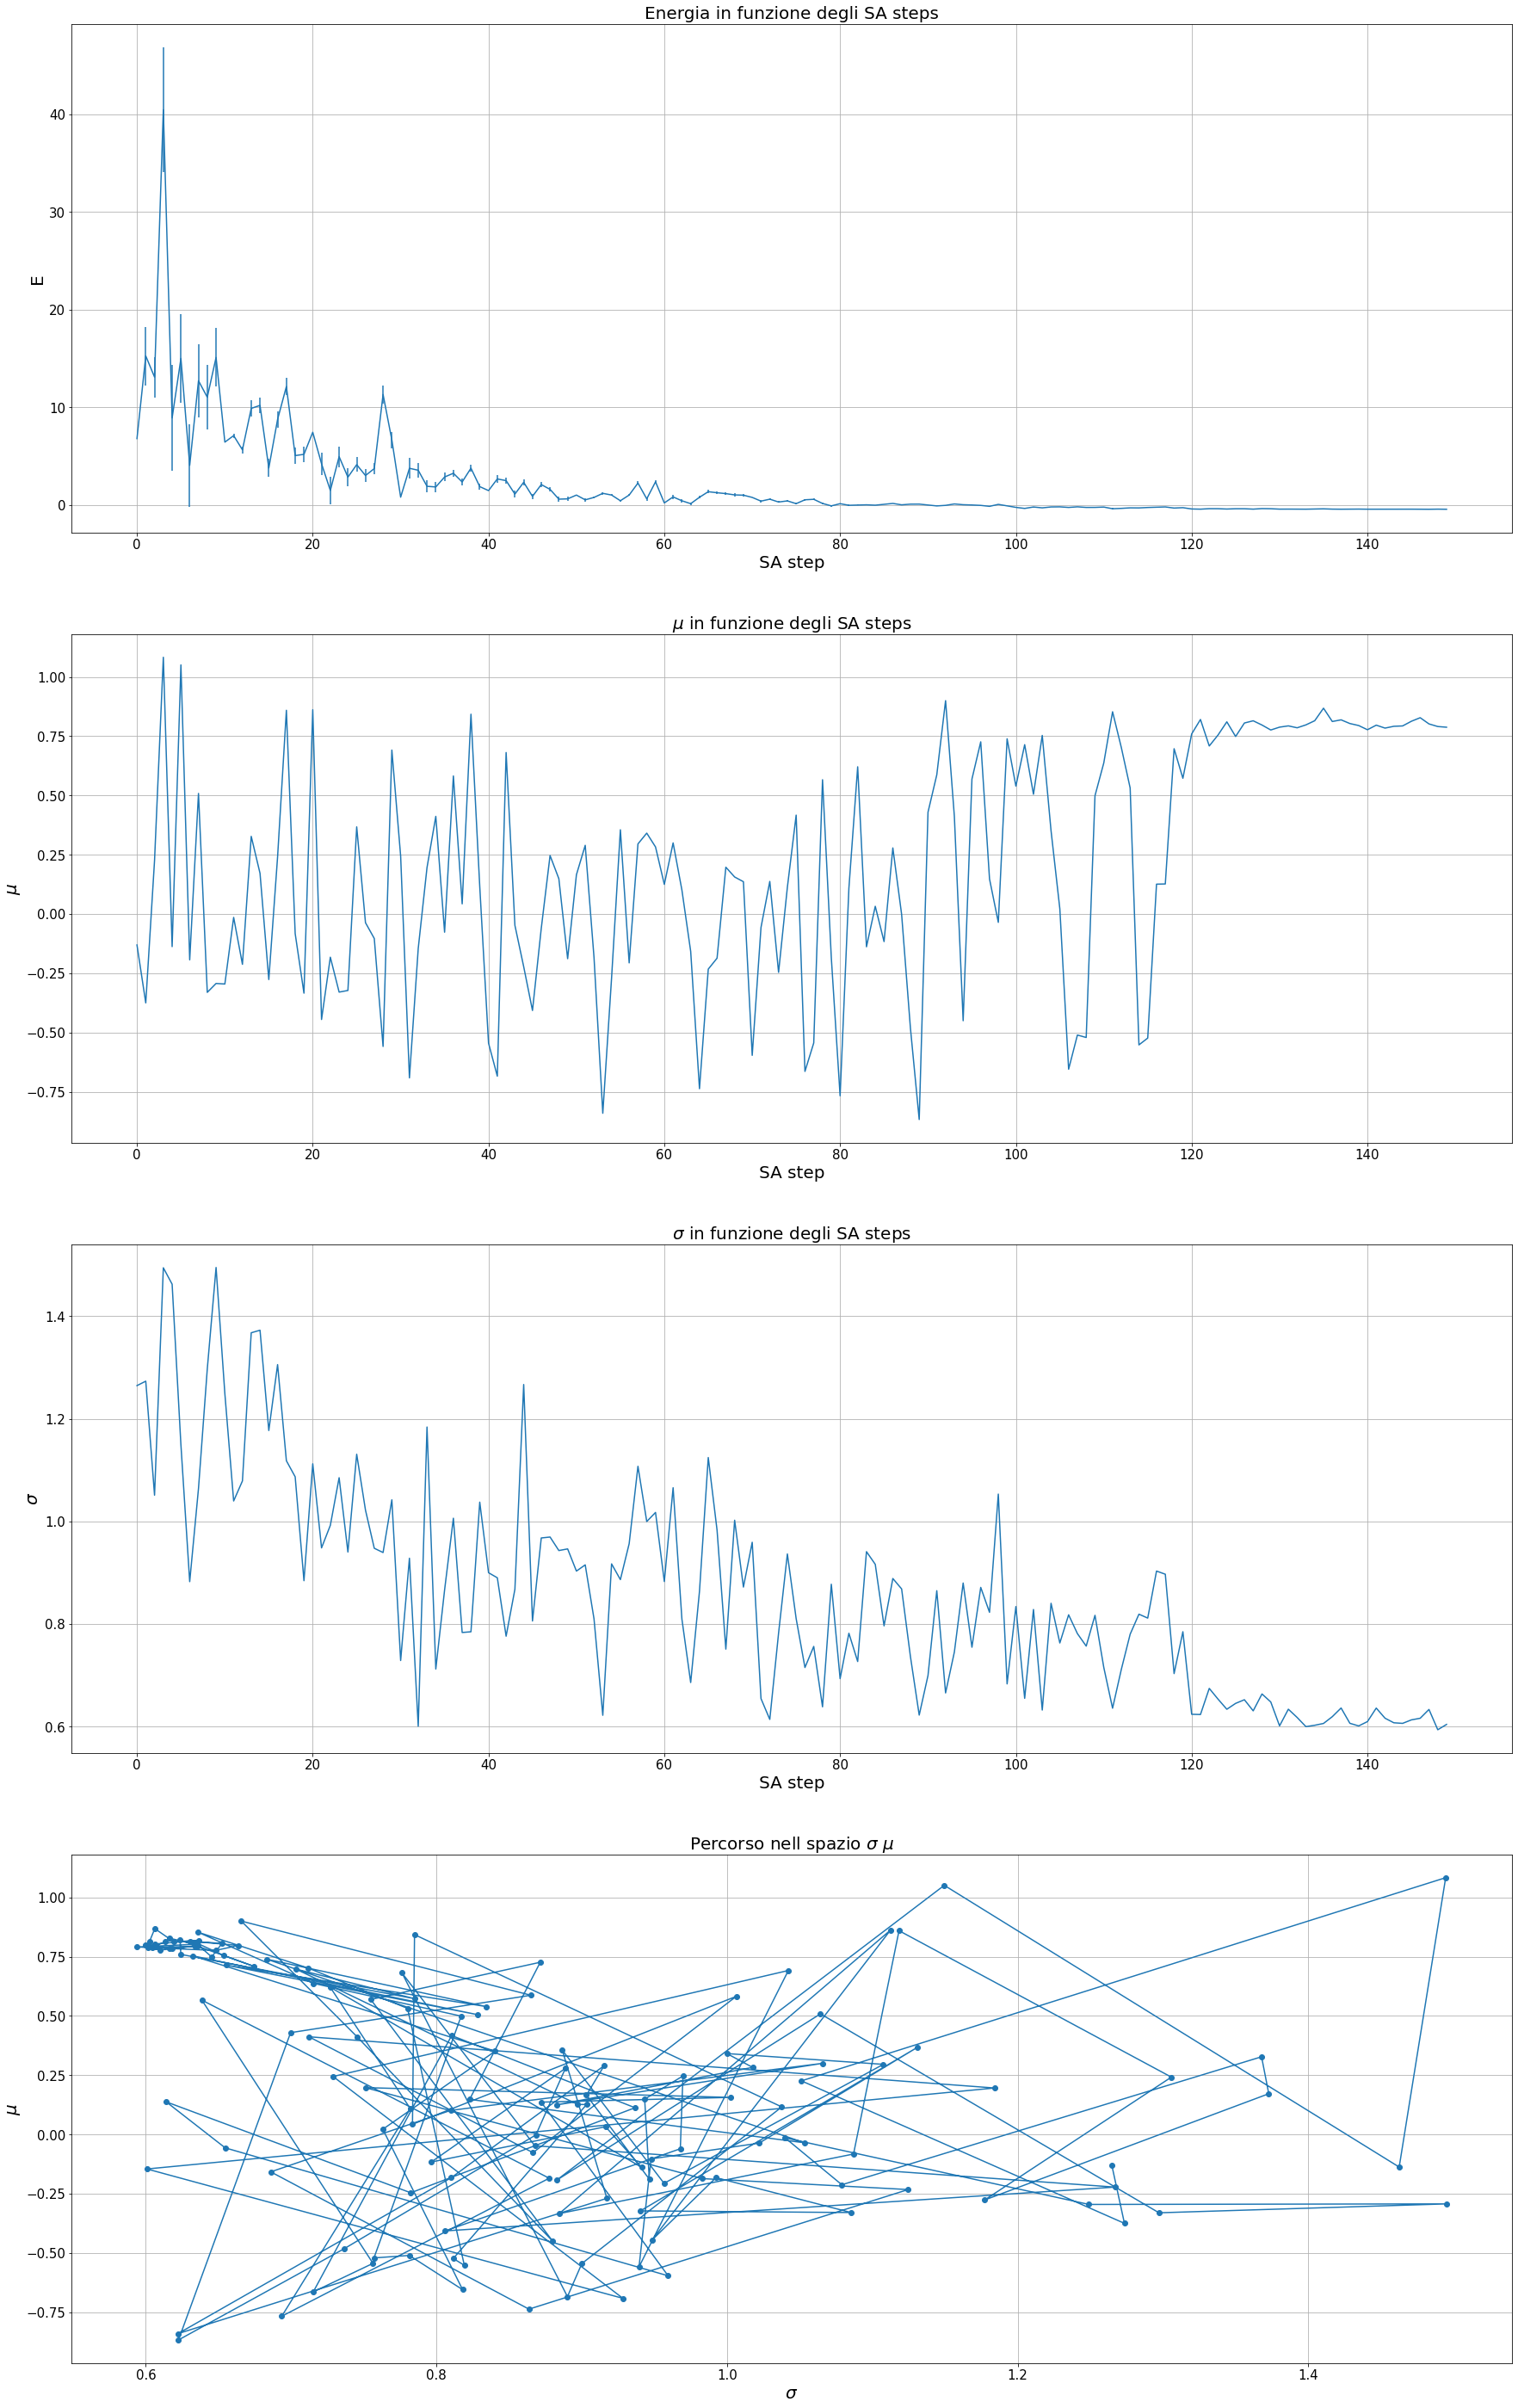

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math

E, errE, M, errm, S, errs = np.loadtxt("ex8.2/Parameters.out", usecols=(1,3,4,6,7,9), unpack='true')
x = np.arange(E.size)

fig, [ax0, ax1, ax2, ax3] = plt.subplots(4, 1, figsize=(30,50))
ax0.errorbar(x, E ,yerr=errE, label="P")
ax0.set_title("Energia in funzione degli SA steps", fontsize=(20))
ax0.set_xlabel("SA step", fontsize=(20))
ax0.set_ylabel("E", fontsize=(20))
ax0.tick_params(labelsize=15)

ax1.plot(x, M)
ax1.set_title("$\mu$ in funzione degli SA steps", fontsize=(20))
ax1.set_xlabel("SA step", fontsize=(20))
ax1.set_ylabel("$\mu$", fontsize=(20))
ax1.tick_params(labelsize=15)

ax2.plot(x, S)
ax2.set_title("$\sigma$ in funzione degli SA steps", fontsize=(20))
ax2.set_xlabel("SA step", fontsize=(20))
ax2.set_ylabel("$\sigma$", fontsize=(20))
ax2.tick_params(labelsize=15)

ax3.plot(S, M, marker="o")
ax3.set_title("Percorso nell spazio $\sigma$ $\mu$", fontsize=(20))
ax3.set_xlabel("$\sigma$", fontsize=(20))
ax3.set_ylabel("$\mu$", fontsize=(20))
ax3.tick_params(labelsize=15)

ax0.grid()
ax3.grid()
ax2.grid()
ax1.grid()

print ("Energia minima =" ,E.min())
print ("mu =", M[E.argmin()])
print ("sigma =", S[E.argmin()])

Dai grafici si può vedere come l'energia scenda, ma non raggiunga mai il valore esatto, ciò potrebbe essere causato dal fatto che l'algoritmo ha trovato un minimo locale che non riesce a scavalcare. Dato che il minimo è comunque ad un buon valore di energia ho deciso di tenere questa simulazione. <br>
La simulazione è stata effettuata facendo 500 step per temperatura divisi in 10 blocchi da 100 step e la temperatura è stata riscalata 15 volte. <br>
L'energia della configurazione corrente è stata calcolata con una media a blocchi con 10 blocchi da 2000 passi.<br>
Sono stati stampati i valori di $\mu$, $\sigma$ ed Energia per ogni blocco di ogni temperatura.

Text(0.5, 1.0, 'Integrale per $\\mu=0.814217$ e $\\sigma=0.668011$')

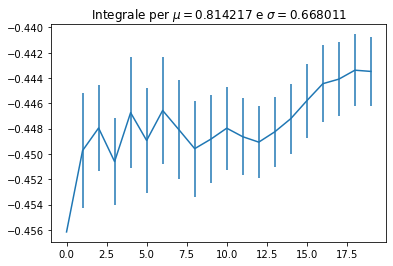

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math

x, f, err = np.loadtxt("ex8.1/Energy.out", usecols=(0,2,3), unpack='true')

plt.errorbar(x, f ,yerr=err, label="Passo uniforme")
plt.title("Integrale per $\mu=0.80182$ e $\sigma=0.633461$")



Il seguente integrale è stato calcolato usando i valori di $\sigma$ e $\mu$ che minimizzano l'energia.
E' stato calcolato usando 20 blocchi da 5000 passi ciascuno e da un valore compatibile con quelo calcolato dal SA.

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.09742471331761199
2nd excited state energy:  1.971733134393021


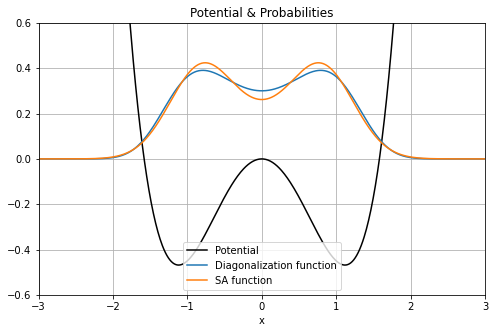

In [24]:
def Psi(x):
    mu = 0.80182
    sigma = 0.633461
     
    return np.exp(-(x-mu)**2/(2*sigma*sigma)) + np.exp(-(x+mu)**2/(2*sigma*sigma))

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, label='Diagonalization function')
#plt.plot(x,(psi[1])**2)
#plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
x = np.arange(-3000, 3000)
x = x/1000
plt.plot(x, 0.36*Psi(x)**2, label='SA function')

plt.legend()

Le due funzioni combaciano abbastanza bene. Da notare il fatto che il simulated annealing mi da la funzione cercata a meno di una costante di normalizzazione che quindi ho settato a mano.